# **Unzipping the Dataset**

In [53]:

import zipfile as z
zip_ref = z.ZipFile('/content/train.csv.zip', "r") #the source path is given
zip_ref.extractall("/content/") #the destination part is given

zip_ref.close()
# 'with open(file name)':no required to close the file

# **Importing important libraries**

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline


In [55]:
df=pd.read_csv("/content/train.csv")
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


# **Data Analysis & Data Visualization**

In [56]:
df.shape

(137, 43)

This says that the dataset has 137 rows and 43 columns. Sumply meaning, there are 137 data points in the datatset and there are 43 features, one of them is target feature.


In [57]:
df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [58]:

df.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

This says there are no Missing Values. Good for us.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

From here we see that **4 of the features are object type** which the model can not understand. So they need to be **encoded**. 

Apart from that, Another observation is that we don't need to use the feature 'ID' as it's anyway **not going to give me any insight of the revenue**. So we will simply drop it.

In [60]:
#The ID column is irrelevant so we will drop them.
df=df.drop('Id',axis=1)
df

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


Now I am going to convert the 'Open Date' feature in **datetime format** so that I can extract the month and year from it. I want to do this because the date doesn't give me any insight of the revenue. But the **month and year surely does.**

In [61]:
df['Open Date'] = pd.to_datetime(df['Open Date'])
df

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


Here I am extracting the **month** from the feature **'Open Date'**.

In [62]:
df['month']=[x.month for x in df['Open Date']]

Here I am extracting the **year** from the feature **'Open Date'**.

In [63]:
df['year']=[x.year for x in df['Open Date']]

Now we will **drop 'Open Date'** as well as we have extracted all the information from it and now its of no use to me.

In [64]:
df['month']

0       7
1       2
2       3
3       2
4       5
       ..
132     6
133    10
134     7
135    10
136     9
Name: month, Length: 137, dtype: int64

In [65]:
df['year']

0      1999
1      2008
2      2013
3      2012
4      2009
       ... 
132    2008
133    2006
134    2006
135    2010
136    2009
Name: year, Length: 137, dtype: int64

In [66]:
df=df.drop(['Open Date'],axis=1)
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


Now let's try to **visualize the trends** in month and year to understand how they affect the revenue.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


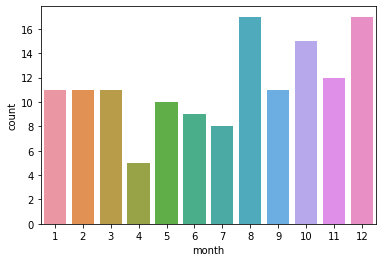

In [67]:
sns.countplot(df['month'])

From the above plot we can look at the occurence of various months in the dataset. We have the most data for the last 5 months. The highest of them is from **August** and **December**. Now let's see in which month did we have the most revenue. For this I will try to find the **mean of the revenue** for each month.

In [68]:
df.groupby('month')['revenue'].mean()


month
1     5.900851e+06
2     4.189109e+06
3     3.969557e+06
4     4.726097e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     5.390856e+06
10    5.236838e+06
11    4.721400e+06
12    4.299763e+06
Name: revenue, dtype: float64

From here we can see that the month **January gave the most revenue** to the restraunts. **September** and **October** followed January. Let's try to plot a bargraph with the same and visualize the same trends.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


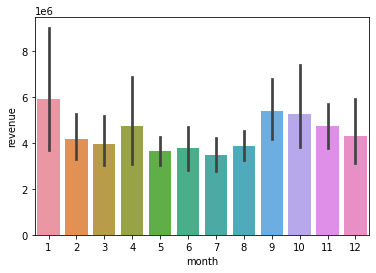

In [69]:
sns.barplot('month','revenue',data=df)

So these bargraphs are giving out the same information. Now lets try to do same kind of stuffs for the newly generated feature **'year'**.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


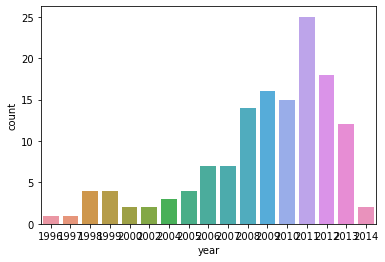

In [70]:
sns.countplot(df['year'])

Here we are having a bit of trouble in visualization because the labels in the x-axis are not clear. Let's try to zoom in a bit!!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


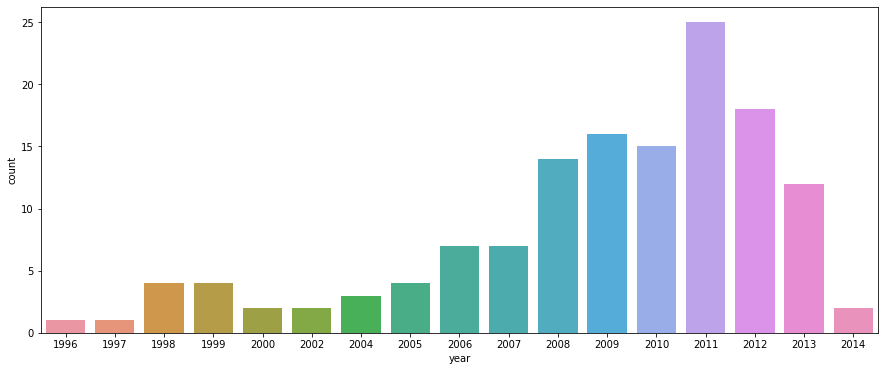

In [71]:
plt.figure(figsize=(15,6))
sns.countplot(df['year'])

From here we can see that the most of the data is from the years **2008-2013**. Out of them the most of the data is from the year 2011. The other years are contruibuting really less on the basis of number of data. This is also going to affect the results as well.


In [72]:
df.groupby('year')['revenue'].mean()


year
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    7.329030e+06
2000    1.359602e+07
2002    4.991022e+06
2004    3.482435e+06
2005    6.611118e+06
2006    4.203972e+06
2007    5.079333e+06
2008    4.876962e+06
2009    4.652457e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.837859e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

From here we can see that the year 2000 gave the most revenue to the restraunts. 1999 and 2005 followed 2000. Let's try to plot a bargraph with the same and visualize the same trends

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


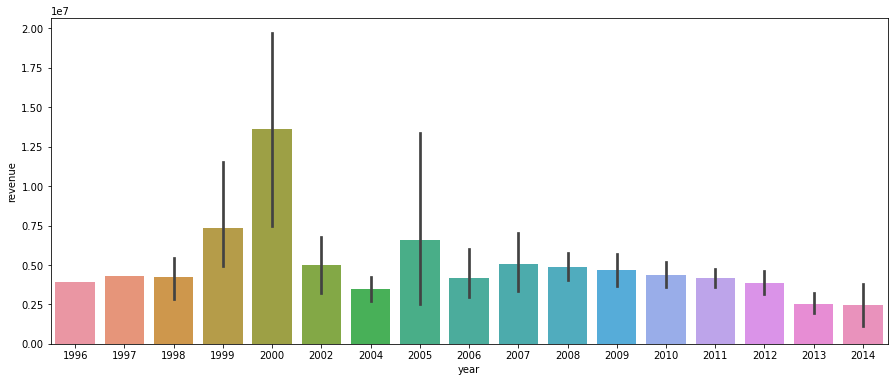

In [73]:
plt.figure(figsize=(15,6))
sns.barplot('year','revenue',data=df)

Out of all the years, the highest revenue was generated in the year **2000** and after that **1999** and **2005**.

# **Data Preprocessing.**

In [74]:
df['Type'].value_counts()


FC    76
IL    60
DT     1
Name: Type, dtype: int64

There are 3 distinct values in the feature **'Type'**. We can encode the values as this:

**FC as 0;**


**IL as 1;**

**DT as 2;**

The order or the numbers can be anything.

In [75]:
ty={'FC':0,'IL':1,'DT':2}
df['Type'] = df['Type'].map(ty)


In [76]:
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,İstanbul,Big Cities,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,Big Cities,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,Other,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,Other,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,Other,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,0,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,Big Cities,0,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,Other,0,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,Big Cities,0,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


In [77]:
df['City Group'].value_counts()


Big Cities    78
Other         59
Name: City Group, dtype: int64

In [78]:
cg={'Big Cities':0,'Other':1}
df['City Group'] = df['City Group'].map(cg)


In [79]:
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,İstanbul,0,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,Ankara,0,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,Diyarbakır,1,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,Tokat,1,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,Gaziantep,1,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,1,0,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,İzmir,0,0,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,Kayseri,1,0,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,İstanbul,0,0,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


In [80]:
a=df['City'].value_counts()
a

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Antalya            4
Sakarya            4
Tekirdağ           3
Kayseri            3
Eskişehir          3
Diyarbakır         3
Adana              3
Konya              2
Aydın              2
Muğla              2
Trabzon            2
Uşak               1
Tokat              1
Gaziantep          1
Kocaeli            1
Denizli            1
Balıkesir          1
Kırklareli         1
Edirne             1
Bolu               1
Kütahya            1
Amasya             1
Şanlıurfa          1
Osmaniye           1
Elazığ             1
Karabük            1
Isparta            1
Kastamonu          1
Afyonkarahisar     1
Name: City, dtype: int64

Here manually creating the dictionary is inefficient. So we will store the city names in a list and then use the element as the **key** of the dictionary and the index of each element as its **key values**. 

In [81]:
b=a.index
b

Index(['İstanbul', 'Ankara', 'İzmir', 'Bursa', 'Samsun', 'Antalya', 'Sakarya',
       'Tekirdağ', 'Kayseri', 'Eskişehir', 'Diyarbakır', 'Adana', 'Konya',
       'Aydın', 'Muğla', 'Trabzon', 'Uşak', 'Tokat', 'Gaziantep', 'Kocaeli',
       'Denizli', 'Balıkesir', 'Kırklareli', 'Edirne', 'Bolu', 'Kütahya',
       'Amasya', 'Şanlıurfa', 'Osmaniye', 'Elazığ', 'Karabük', 'Isparta',
       'Kastamonu', 'Afyonkarahisar'],
      dtype='object')

In [82]:
c={}
for i,j in enumerate(b):
  c.update({j:i})
print(c)


{'İstanbul': 0, 'Ankara': 1, 'İzmir': 2, 'Bursa': 3, 'Samsun': 4, 'Antalya': 5, 'Sakarya': 6, 'Tekirdağ': 7, 'Kayseri': 8, 'Eskişehir': 9, 'Diyarbakır': 10, 'Adana': 11, 'Konya': 12, 'Aydın': 13, 'Muğla': 14, 'Trabzon': 15, 'Uşak': 16, 'Tokat': 17, 'Gaziantep': 18, 'Kocaeli': 19, 'Denizli': 20, 'Balıkesir': 21, 'Kırklareli': 22, 'Edirne': 23, 'Bolu': 24, 'Kütahya': 25, 'Amasya': 26, 'Şanlıurfa': 27, 'Osmaniye': 28, 'Elazığ': 29, 'Karabük': 30, 'Isparta': 31, 'Kastamonu': 32, 'Afyonkarahisar': 33}


In [83]:
c

{'Adana': 11,
 'Afyonkarahisar': 33,
 'Amasya': 26,
 'Ankara': 1,
 'Antalya': 5,
 'Aydın': 13,
 'Balıkesir': 21,
 'Bolu': 24,
 'Bursa': 3,
 'Denizli': 20,
 'Diyarbakır': 10,
 'Edirne': 23,
 'Elazığ': 29,
 'Eskişehir': 9,
 'Gaziantep': 18,
 'Isparta': 31,
 'Karabük': 30,
 'Kastamonu': 32,
 'Kayseri': 8,
 'Kocaeli': 19,
 'Konya': 12,
 'Kütahya': 25,
 'Kırklareli': 22,
 'Muğla': 14,
 'Osmaniye': 28,
 'Sakarya': 6,
 'Samsun': 4,
 'Tekirdağ': 7,
 'Tokat': 17,
 'Trabzon': 15,
 'Uşak': 16,
 'İstanbul': 0,
 'İzmir': 2,
 'Şanlıurfa': 27}

In [84]:
df['City'] = df['City'].map(c)
df

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,0,0,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,7,1999
1,1,0,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2,2008
2,10,1,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,3,2013
3,17,1,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2,2012
4,18,1,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,15,1,0,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,6,2008
133,2,0,0,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,10,2006
134,8,1,0,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,7,2006
135,0,0,0,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,10,2010


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        137 non-null    int64  
 1   City Group  137 non-null    int64  
 2   Type        137 non-null    int64  
 3   P1          137 non-null    int64  
 4   P2          137 non-null    float64
 5   P3          137 non-null    float64
 6   P4          137 non-null    float64
 7   P5          137 non-null    int64  
 8   P6          137 non-null    int64  
 9   P7          137 non-null    int64  
 10  P8          137 non-null    int64  
 11  P9          137 non-null    int64  
 12  P10         137 non-null    int64  
 13  P11         137 non-null    int64  
 14  P12         137 non-null    int64  
 15  P13         137 non-null    float64
 16  P14         137 non-null    int64  
 17  P15         137 non-null    int64  
 18  P16         137 non-null    int64  
 19  P17         137 non-null    i

Now everything looks just fine. So we can go ahead with the data and start model building.

# **Building the Model**

The first task will be to **split the dataset** into train set and test set.

In [86]:
from sklearn.model_selection import train_test_split
x=df.drop('revenue',axis=1)
y=df['revenue']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)


Let's check the dimension of train and test set.

In [87]:
X_train.shape

(95, 42)

In [88]:
y_train.shape

(95,)

In [89]:
X_test.shape

(42, 42)

In [90]:

y_test.shape

(42,)

Before moving ahead, I am importing all the models from sklearn

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

## Linear Regression

In [92]:
lr = LinearRegression() #create the object of the model
lr=lr.fit(X_train,y_train)

In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [94]:
pred = lr.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the linear regressor is: "+str(s))
print("The MsE with the linear regressor is: "+str(s1))
print("The R2_Score with the linear regressor is: "+str(s2))

The MAE with the linear regressor is: 3149929.0886107767
The MsE with the linear regressor is: 18164291508209.06
The R2_Score with the linear regressor is: -0.6310520861004525


## Decision Tree Regressor

In [95]:
dtr = DecisionTreeRegressor() #create the object of the model
dtr=dtr.fit(X_train,y_train)

In [96]:
pred = dtr.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the DT regressor is: "+str(s))
print("The MsE with the DT regressor is: "+str(s1))
print("The R2_Score with the DT regressor is: "+str(s2))

The MAE with the DT regressor is: 2358842.1666666665
The MsE with the DT regressor is: 14333399238054.404
The R2_Score with the DT regressor is: -0.28705932282432967


## Random Forest Regressor

In [97]:
r = RandomForestRegressor() #create the object of the model
r=r.fit(X_train,y_train)

In [98]:
X_train.shape

(95, 42)

In [99]:
pred = r.predict(X_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the RF regressor is: "+str(s))
print("The MsE with the RF regressor is: "+str(s1))
print("The R2_Score with the RF regressor is: "+str(s2))

The MAE with the RF regressor is: 2064533.128333333
The MsE with the RF regressor is: 11990191748915.629
The R2_Score with the RF regressor is: -0.07665235695953032


From all the models, RF regressor gave the minimum error, So thats the best model and should be chosen as the final model.